In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat as load
from scipy.fft import fft, fftfreq, fftshift

La Transformada de Fourier (TF) es una herramienta matemática que permite analizar una señal en términos de su contenido de frecuencia. Es una forma de descomponer una señal en sus componentes de frecuencia y magnitud correspondientes, lo que puede ser muy útil en el análisis de señales y sistemas.

En términos generales, la TF es una integral que convierte una función del dominio del tiempo en una función del dominio de la frecuencia. La TF de una señal es una función compleja que describe la cantidad de energía de la señal que se encuentra en cada frecuencia. Específicamente, la TF se define como:

$$X(\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t} dt$$

donde $x(t)$ es la señal de entrada, $X(\omega)$ es la TF de la señal, y $j$ es la unidad imaginaria. En otras palabras, la TF mide la contribución de cada frecuencia presente en una señal continua, en términos de amplitud y fase.

Una de las principales aplicaciones de la TF es en el análisis de espectros de señales. Un espectro es una representación gráfica de la distribución de energía de una señal en el dominio de la frecuencia. La TF permite obtener el espectro de una señal a partir de su representación en el dominio del tiempo.

La TF también se utiliza en la síntesis de señales, que consiste en construir una señal a partir de su espectro de frecuencia. Por ejemplo, si se conoce el espectro de una señal de audio, se puede utilizar la TF inversa para reconstruir la señal de audio original.

La TF tiene varias propiedades útiles que la hacen una herramienta poderosa en el análisis de señales. Una de las propiedades más importantes es la propiedad de linealidad, que establece que la TF de una suma ponderada de señales es igual a la suma ponderada de las TF de las señales individuales. Es decir:

$$\mathcal{F}{a_1x_1(t) + a_2x_2(t)} = a_1\mathcal{F}{x_1(t)} + a_2\mathcal{F}{x_2(t)}$$

donde $\mathcal{F}{\cdot}$ denota la transformada de Fourier, y $a_1$ y $a_2$ son constantes.

Otra propiedad importante de la TF es la propiedad de simetría, que establece que la TF de una señal real es una función simétrica. Esto significa que la parte real de la TF es una función par y la parte imaginaria es una función impar.

La TF también tiene una propiedad de convolución, que establece que la TF de la convolución de dos señales es igual al producto de sus transformadas de Fourier. Es decir:

$$\mathcal{F}{x_1(t)*x_2(t)} = \mathcal{F}{x_1(t)} \cdot \mathcal{F}{x_2(t)}$$

donde $*$ denota la operación de convolución.

In [2]:
# Definición de una señal de prueba con 20 frecuencias aleatorias
t = np.linspace(0, 1, 1000)
x = np.zeros_like(t)
f=[]
fs = 1000
for i in range(20):
    f.append(np.random.randint(1, 100))
    x += np.random.randint(1,100)*np.sin(2*np.pi*f[i]*t)

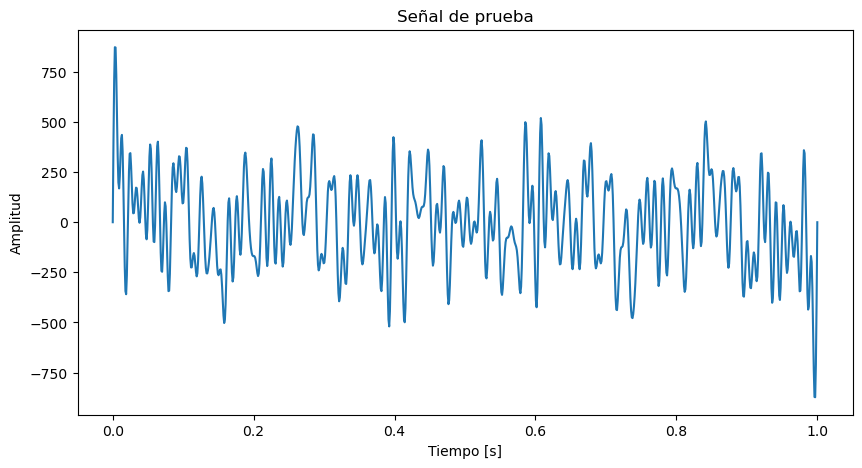

In [3]:
# Gráfica de la señal de prueba
plt.figure(figsize=(10, 5))
plt.plot(t, x)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal de prueba')
plt.show()

In [4]:
#TF de la señal de prueba
X = fft(x)
X_mag = np.abs(X)
X_phase = np.angle(X)
X_freq = fftfreq(len(x), 1/fs)

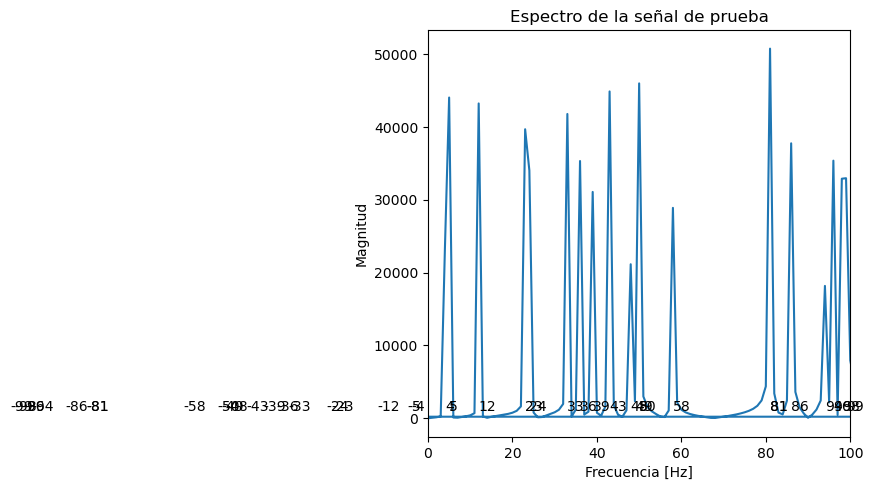

In [5]:
# Gráfica del espectro de la señal de prueba con lineas en las frecuencias de las componentes
plt.figure(figsize=(20, 5),tight_layout=True)
plt.plot(X_freq, X_mag)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 100)
plt.title('Espectro de la señal de prueba')
for i in range(20):
    #plt.axvline(f[i], color='r', linestyle='--')
    plt.text(f[i], 1000, str(f[i]), color='k')
    #plt.axvline(-f[i], color='r', linestyle='--')
    plt.text(-f[i], 1000, str(-f[i]), color='k')
plt.show()


## Transformada de Fourier discreta

La TF discreta (DTF) es una versión discreta de la TF. La DTF se utiliza para analizar señales discretas, como las señales de audio y video. La DTF se define como:

$$X[k] = \sum_{n=0}^{N-1} x[n]e^{-j\frac{2\pi}{N}kn}$$

donde $x[n]$ es la señal de entrada, $X[k]$ es la DTF de la señal, $N$ es el número de muestras de la señal, y $k$ es el índice de la DTF. La DTF se puede calcular utilizando la FFT, que es una implementación eficiente de la DTF.

La FFT es una técnica de cálculo de la DTF que utiliza la propiedad de simetría de la DTF para reducir el número de operaciones necesarias para calcular la DTF. La FFT se basa en la descomposición de la DTF en factores de números primos. Por ejemplo, la DTF de una señal de 16 muestras se puede descomponer en la DTF de dos señales de 8 muestras y la DTF de dos señales de 2 muestras. La FFT se puede implementar de forma recursiva para calcular la DTF de señales de cualquier longitud.

La FFT es una técnica muy eficiente para calcular la DTF. Sin embargo, la FFT tiene algunas limitaciones. En primer lugar, la FFT solo puede calcular la DTF de señales de longitud $N = 2^n$, donde $n$ es un número entero. En segundo lugar, la FFT solo puede calcular la DTF de señales reales. Por lo tanto, si se desea calcular la DTF de una señal compleja, se debe calcular la DTF de la parte real y la parte imaginaria de la señal por separado.

## Descomposición en frecuencias de cualquier señal

Todo lo discutido antes de la Transformada de Fourier gana trascedencia cuando nos damos cuenta de que cualquier señal puede ser descompuesta en una suma de señales senoidales.
Esto es posible porque la Transformada de Fourier es una herramienta que nos permite pasar de un dominio a otro, en este caso del dominio del tiempo al dominio de la frecuencia.
Esto nos permite ver la señal en el dominio de la frecuencia, y así poder descomponerla en una suma de señales senoidales.

La Transformada de Fourier nos permite ver la señal en el dominio de la frecuencia, y así poder descomponerla en una suma de señales senoidales.

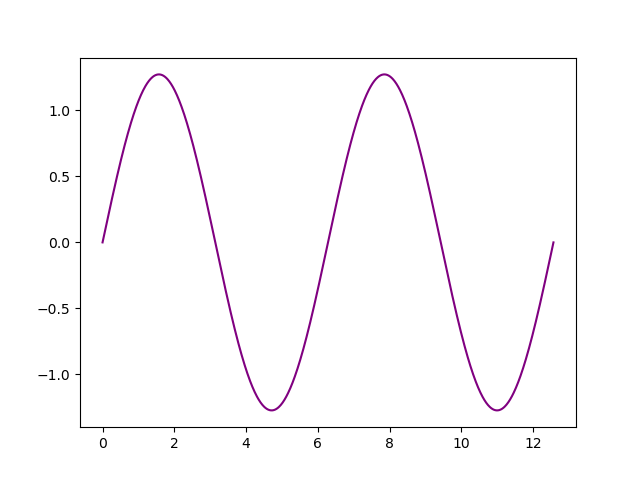

In [54]:
%matplotlib ipympl

from matplotlib.animation import FuncAnimation


# Definimos la señal cuadrada
def square_wave(x, n):
    f = 0
    for i in range(1, n + 1, 2):
        f += (4 / np.pi) * np.sin(i * x) / i
    return f


# Definimos los límites de la señal y los armónicos de Fourier a calcular
x_min = 0
x_max = 4 * np.pi
n_max = 100

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Dibujamos la señal cuadrada
x = np.linspace(x_min, x_max, 1000)
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = square_wave(x[i], 1)
line, = ax.plot(x, y, color='purple')


# Función para actualizar la animación
def update(frame):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = square_wave(x[i], frame)
    line.set_ydata(y)
    ax.set_title('Armonicos de Fourier: {}'.format(frame))
    return line,


# Creamos la animación
ani = FuncAnimation(fig, update, frames=range(1, n_max + 1), interval=50, blit=True)

# Mostramos la animación
plt.show()


## Armonicos de Fourier

La Transformada de Fourier nos permite ver la señal en el dominio de la frecuencia, y así poder descomponerla en una suma de señales senoidales.
estas señales senoidales se llaman armonicos de Fourier, y son las que se suman para formar la señal original.
Todos los armonicos de Fourier como conjunto forman la señal original sea cual sea.

# Señales Reales

In [9]:
signal=load(r"D:\Documentos\CUCEI\Clases\Seminario_De_Analisis_del_movimiento\data\data\SSAM_1.mat")
signal2=load(r"D:\Documentos\CUCEI\Clases\Seminario_De_Analisis_del_movimiento\data\data\SSAM_2.mat")
signal3=load(r"D:\Documentos\CUCEI\Clases\Seminario_De_Analisis_del_movimiento\data\data\SSAM_3.mat")

In [10]:
#Extraemos la información de la señal
emg=signal['data']
emg2=signal2['data']
emg3=signal3['data']

Text(0.5, 1.0, 'Señal 3')

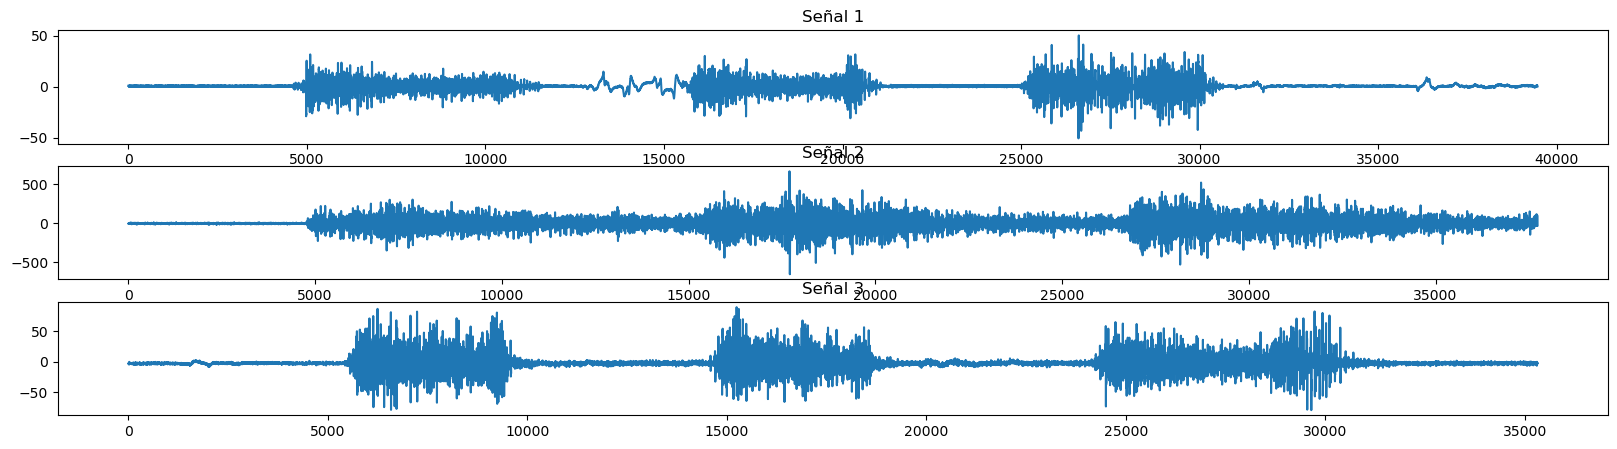

In [12]:
plt.figure(figsize=(20, 5))
plt.subplot(3,1,1)
plt.plot(emg)
plt.title('Señal 1')
plt.subplot(3,1,2)
plt.plot(emg2)
plt.title('Señal 2')
plt.subplot(3,1,3)
plt.plot(emg3)
plt.title('Señal 3')

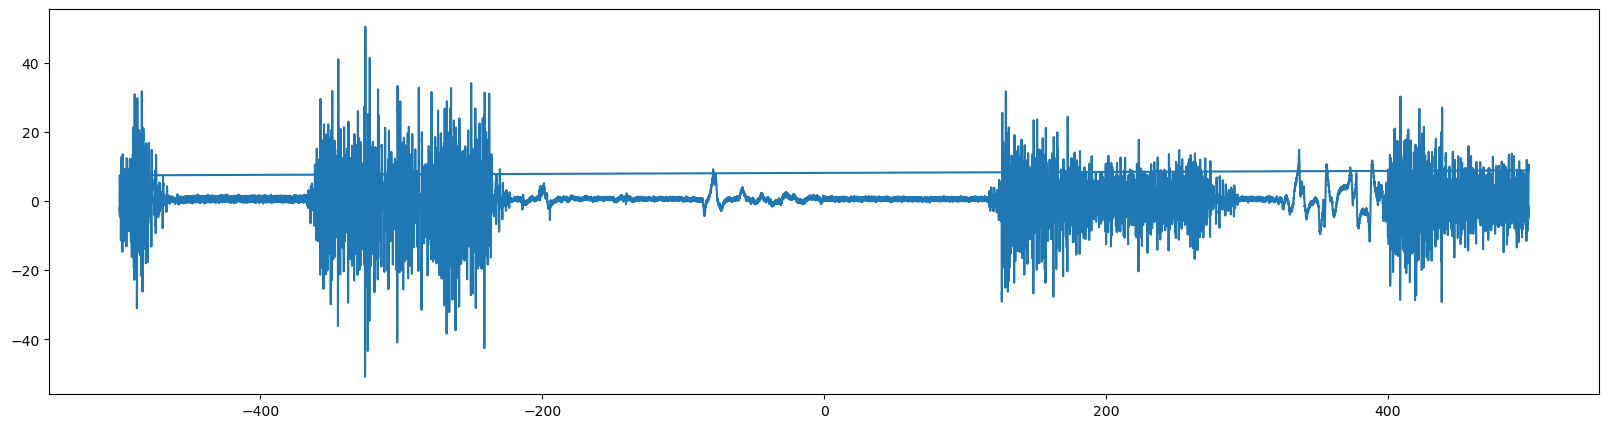

In [53]:
#Calculamos la transformada de Fourier de la señal de EMG
ft1=fft(emg)
#Crear un arreglo de frecuencias
freqs=fftfreq(len(emg),1/1000)
#Gráfica de la transformada de Fourier
plt.figure(figsize=(20, 5))
#plt.subplot(3,1,1)
plt.plot(freqs,ft1)
plt.show()

In [6]:
signal4=load(r"D:\Descargas\EEG_crudo.mat")

In [8]:
signal4

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 05 14:58:51 2019',
 '__version__': '1.0',
 '__globals__': [],
 'EEG': array([[133.98550562, 139.13423547, 142.68113825, ...,   7.55558378,
           2.86451881,  -0.7968002 ],
        [ 99.43180752, 100.00388862,  99.54622374, ...,   8.81416219,
           4.23751343,   2.29243771],
        [ 79.04554958,  80.86788471,  81.55126038, ...,  10.59408647,
           7.74668784,   5.92435271],
        ...,
        [ 38.36019297,  42.58392281,  45.20948461, ...,  10.27809722,
           9.82147777,   9.02239375],
        [-18.26568881, -10.84562286,  -3.88217636, ...,   0.45570835,
          -1.02830484,  -2.16985344],
        [ 30.18091353,  30.18091353,  28.58640449, ...,   7.40221299,
           7.40221299,   7.06053249]])}

In [15]:
EEG=signal4['EEG']

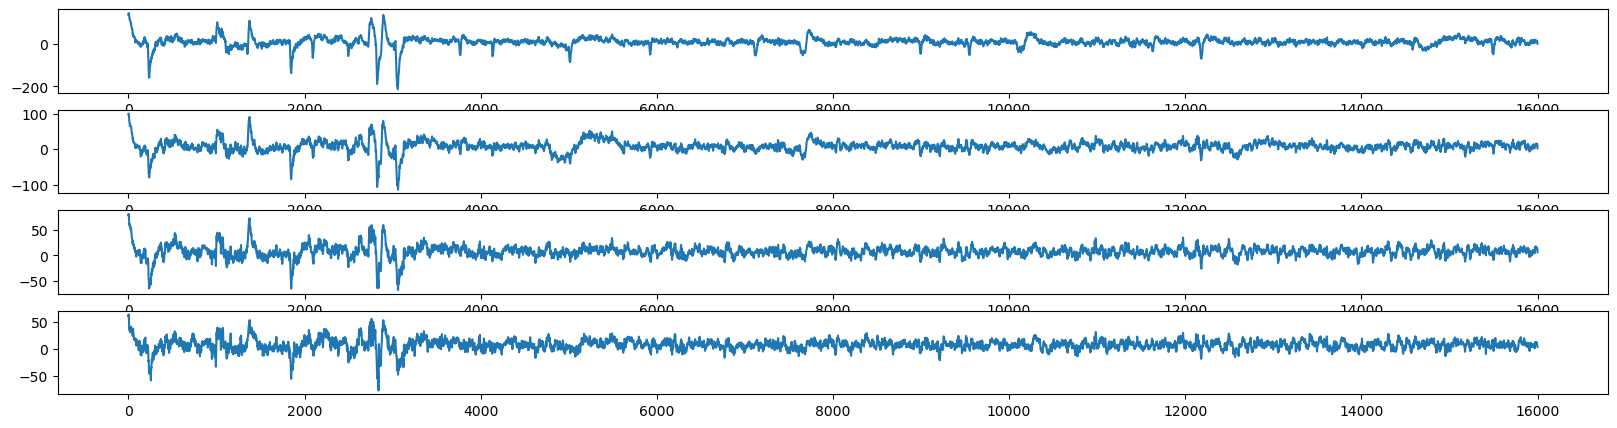

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(4,1,1)
plt.plot(EEG[0,:])
plt.subplot(4,1,2)
plt.plot(EEG[1,:])
plt.subplot(4,1,3)
plt.plot(EEG[2,:])
plt.subplot(4,1,4)
plt.plot(EEG[3,:])

In [19]:
import mne

c:\Users\Lordleojz\.conda\envs\CUCEI\Lib\site-packages\mne\externals\tempita\__init__.py:35: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi


In [22]:
ecg=mne.io.read_raw_edf(r"D:\Documentos\CUCEI\Clases\Procesamiento_de_Biosenales\Data\LJZ.edf",preload=True)

Extracting EDF parameters from D:\Documentos\CUCEI\Clases\Procesamiento_de_Biosenales\Data\LJZ.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 60999  =      0.000 ...    60.999 secs...


In [23]:
ecg_sig=ecg.get_data()

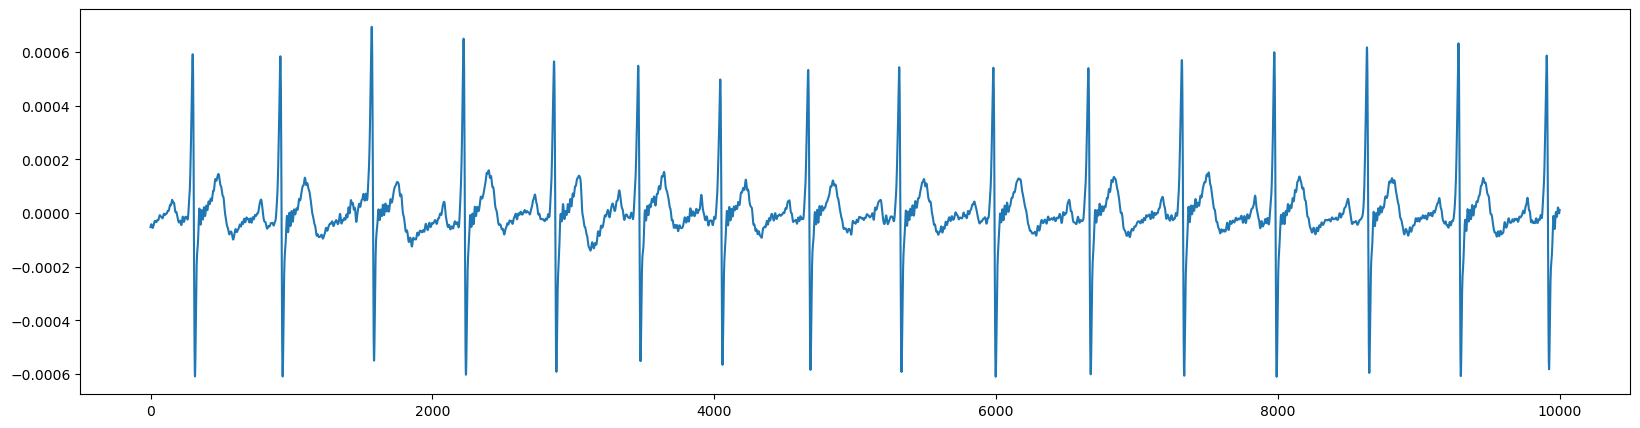

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(ecg_sig[0,10000:20000])